In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('Online News Popularity.csv', skipinitialspace = True)
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8,11,346,0.529052,1.0,0.684783,9,7,1,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8,12,328,0.696296,1.0,0.885057,9,7,3,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8,10,442,0.516355,1.0,0.644128,24,1,12,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8,6,682,0.539493,1.0,0.692661,10,1,1,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


In [3]:
#Dropping two non-predictive attributes as they will not contribute to the data

df.drop(labels=['url'], axis=1, inplace=True)
df.head(n=4)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


array([[<Axes: title={'center': 'timedelta'}>,
        <Axes: title={'center': 'n_tokens_title'}>,
        <Axes: title={'center': 'n_tokens_content'}>,
        <Axes: title={'center': 'n_unique_tokens'}>,
        <Axes: title={'center': 'n_non_stop_words'}>,
        <Axes: title={'center': 'n_non_stop_unique_tokens'}>,
        <Axes: title={'center': 'num_hrefs'}>,
        <Axes: title={'center': 'num_self_hrefs'}>],
       [<Axes: title={'center': 'num_imgs'}>,
        <Axes: title={'center': 'num_videos'}>,
        <Axes: title={'center': 'average_token_length'}>,
        <Axes: title={'center': 'num_keywords'}>,
        <Axes: title={'center': 'data_channel_is_lifestyle'}>,
        <Axes: title={'center': 'data_channel_is_entertainment'}>,
        <Axes: title={'center': 'data_channel_is_bus'}>,
        <Axes: title={'center': 'data_channel_is_socmed'}>],
       [<Axes: title={'center': 'data_channel_is_tech'}>,
        <Axes: title={'center': 'data_channel_is_world'}>,
        <Ax

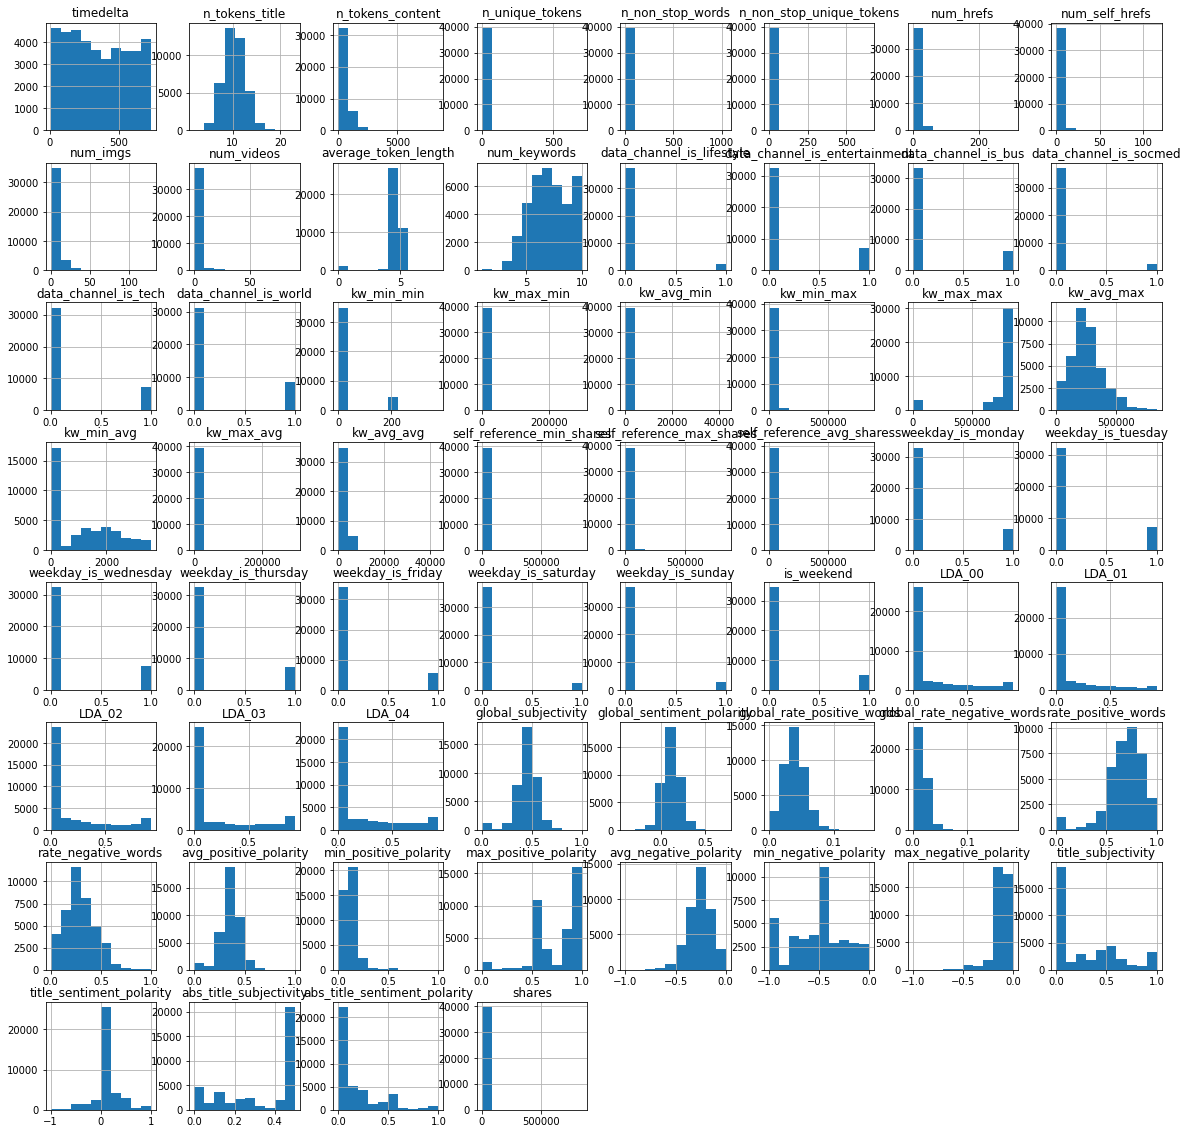

In [4]:
df.hist(figsize=(20,20))

In [5]:
df = df.drop(['n_unique_tokens','n_non_stop_unique_tokens','kw_max_min','kw_avg_min','kw_max_avg','self_reference_min_shares','self_reference_avg_sharess'], axis = 1)

In [6]:
#identifying the null values

df.isna().sum()

timedelta                        0
n_tokens_title                   0
n_tokens_content                 0
n_non_stop_words                 0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_avg_avg                       0
self_reference_max_shares        0
weekday_is_monday                0
weekday_is_tuesday               0
weekday_is_wednesday             0
weekday_is_thursday              0
weekday_is_friday                0
weekday_is_saturday 

In [7]:
#EDA

linebreak = '------------------' 

#Check Shape
print(linebreak*3)
print("Shape: ")
print(df.shape)
print(linebreak*3)
    
#Check Feature Names
print("Column Names: ")
print(df.columns)
print(linebreak*3)
    
#Check types, missing, memory
print("Data Types, Missing Data, Memory: ")
print(df.info())
print(linebreak*3)

------------------------------------------------------
Shape: 
(39644, 53)
------------------------------------------------------
Column Names: 
Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_non_stop_words',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_avg_avg', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',

In [8]:
df['shares'].count()

39644

In [9]:
#checking the target variable

share_df = df['shares']
df['shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [10]:
df.shape

(39644, 53)

### Check for Outliers

**num_videos**

In [11]:
#To check for outliers in num_videos

outliers_range = range(0,80,10)
df.num_videos.groupby(pd.cut(df.num_videos, outliers_range)).count()

num_videos
(0, 10]     13195
(10, 20]      848
(20, 30]      486
(30, 40]       46
(40, 50]       13
(50, 60]       12
(60, 70]        3
Name: num_videos, dtype: int64

In [12]:
#checking percentage of outliers

outliers_percentage = ((486+46+13+12+3)/(13195+848+486+46+9+12+3))*100
outliers_percentage

3.8358791698061507

In [13]:
# dropping the outliers
df = df[df.num_videos <= 20]
len(df)

39069

**num_self_hrefs**

In [14]:
#Outliers in num_self_hrefs

outliers_range = range(0,100,20)
df.num_self_hrefs.groupby(pd.cut(df.num_self_hrefs, outliers_range)).count()

num_self_hrefs
(0, 20]     33364
(20, 40]      331
(40, 60]       18
(60, 80]        6
Name: num_self_hrefs, dtype: int64

In [15]:
outliers_percentage = ((331+18+6)/(33922+331+18+6))*100
outliers_percentage

1.0356799019750853

In [16]:
# dropping the outliers in num_self_hrefs
df = df[df.num_self_hrefs <= 20]
len(df)

38713

**n_tokens_title**

In [17]:
#Outliers in n_tokens_title

outliers_range = range(0,20,3)
df.n_tokens_title.groupby(pd.cut(df.n_tokens_title, outliers_range)).count()

n_tokens_title
(0, 3]          5
(3, 6]        997
(6, 9]      12367
(9, 12]     19127
(12, 15]     5842
(15, 18]      366
Name: n_tokens_title, dtype: int64

In [18]:
outliers_percentage = ((5+997+366)/(12367+19127+5842))*100
outliers_percentage

3.664023998285837

In [19]:
# dropping the outliers in n_tokens_title

df = df[(df.n_tokens_title > 6) & (df.n_tokens_title <= 15)]
len(df)

37336

**num_hrefs**

In [20]:
#Outliers in num_hrefs

outliers_range = range(0,220,30)
df.num_hrefs.groupby(pd.cut(df.num_hrefs, outliers_range)).count()

num_hrefs
(0, 30]       34493
(30, 60]       1347
(60, 90]        189
(90, 120]        35
(120, 150]        6
(150, 180]        6
(180, 210]        2
Name: num_hrefs, dtype: int64

In [21]:
outliers_percentage = ((1347+189+35+6+6+2)/(34493+1347+189+35+6+6+2))*100
outliers_percentage

4.393259049836465

In [22]:
# dropping the outliers

df = df[(df.n_tokens_title <= 30)]
len(df)

37336

**kw_min_max**

In [23]:
#Check for outliers

outliers_range = range(0,60000,10000)
df.kw_min_max.groupby(pd.cut(df.kw_min_max, outliers_range)).count()

kw_min_max
(0, 10000]        13045
(10000, 20000]     3498
(20000, 30000]     1385
(30000, 40000]      731
(40000, 50000]      583
Name: kw_min_max, dtype: int64

In [24]:
outliers_percentage = ((583)/(13045+3498+1385+731+583))*100
outliers_percentage

3.029830578941898

In [25]:
# dropping the outliers

df = df[(df.kw_min_max <= 40000)]
len(df)

34872

**kw_avg_avg**

In [26]:
#Check for outliers

outliers_range = range(0,50000,3000)
df.kw_avg_avg.groupby(pd.cut(df.kw_avg_avg, outliers_range)).count()

kw_avg_avg
(0, 3000]         20485
(3000, 6000]      13731
(6000, 9000]        465
(9000, 12000]        74
(12000, 15000]       23
(15000, 18000]       17
(18000, 21000]        7
(21000, 24000]        1
(24000, 27000]        1
(27000, 30000]        1
(30000, 33000]        0
(33000, 36000]        2
(36000, 39000]        1
(39000, 42000]        0
(42000, 45000]        1
(45000, 48000]        0
Name: kw_avg_avg, dtype: int64

In [27]:
outliers_percentage = ((465+74+40+14)/(20485+13731+465+74+40+14))*100
outliers_percentage

1.7035824068488037

In [28]:
# dropping the outliers

df = df[(df.kw_avg_avg <= 6000)]
len(df)

34279

**self_reference_max_shares**

In [29]:
#Check for outliers

outliers_range = range(0,80000,8000)
df.self_reference_max_shares.groupby(pd.cut(df.self_reference_max_shares, outliers_range)).count()

self_reference_max_shares
(0, 8000]         20030
(8000, 16000]      4066
(16000, 24000]     1531
(24000, 32000]      586
(32000, 40000]      359
(40000, 48000]      267
(48000, 56000]      250
(56000, 64000]      168
(64000, 72000]      118
Name: self_reference_max_shares, dtype: int64

In [30]:
outliers_percentage = ((359+267+250+168+118)/(20030+4066+1531+586+359+267+250+168+118))*100
outliers_percentage

4.244748858447489

In [31]:
# dropping the outliers

df = df[(df.self_reference_max_shares <= 32000)]
len(df)

32602

dropping the outliers
df = df.drop(['num_videos','num_self_hrefs','n_tokens_title','num_hrefs','kw_min_max','kw_avg_avg','self_reference_max_shares'], axis = 1)

<Axes: >

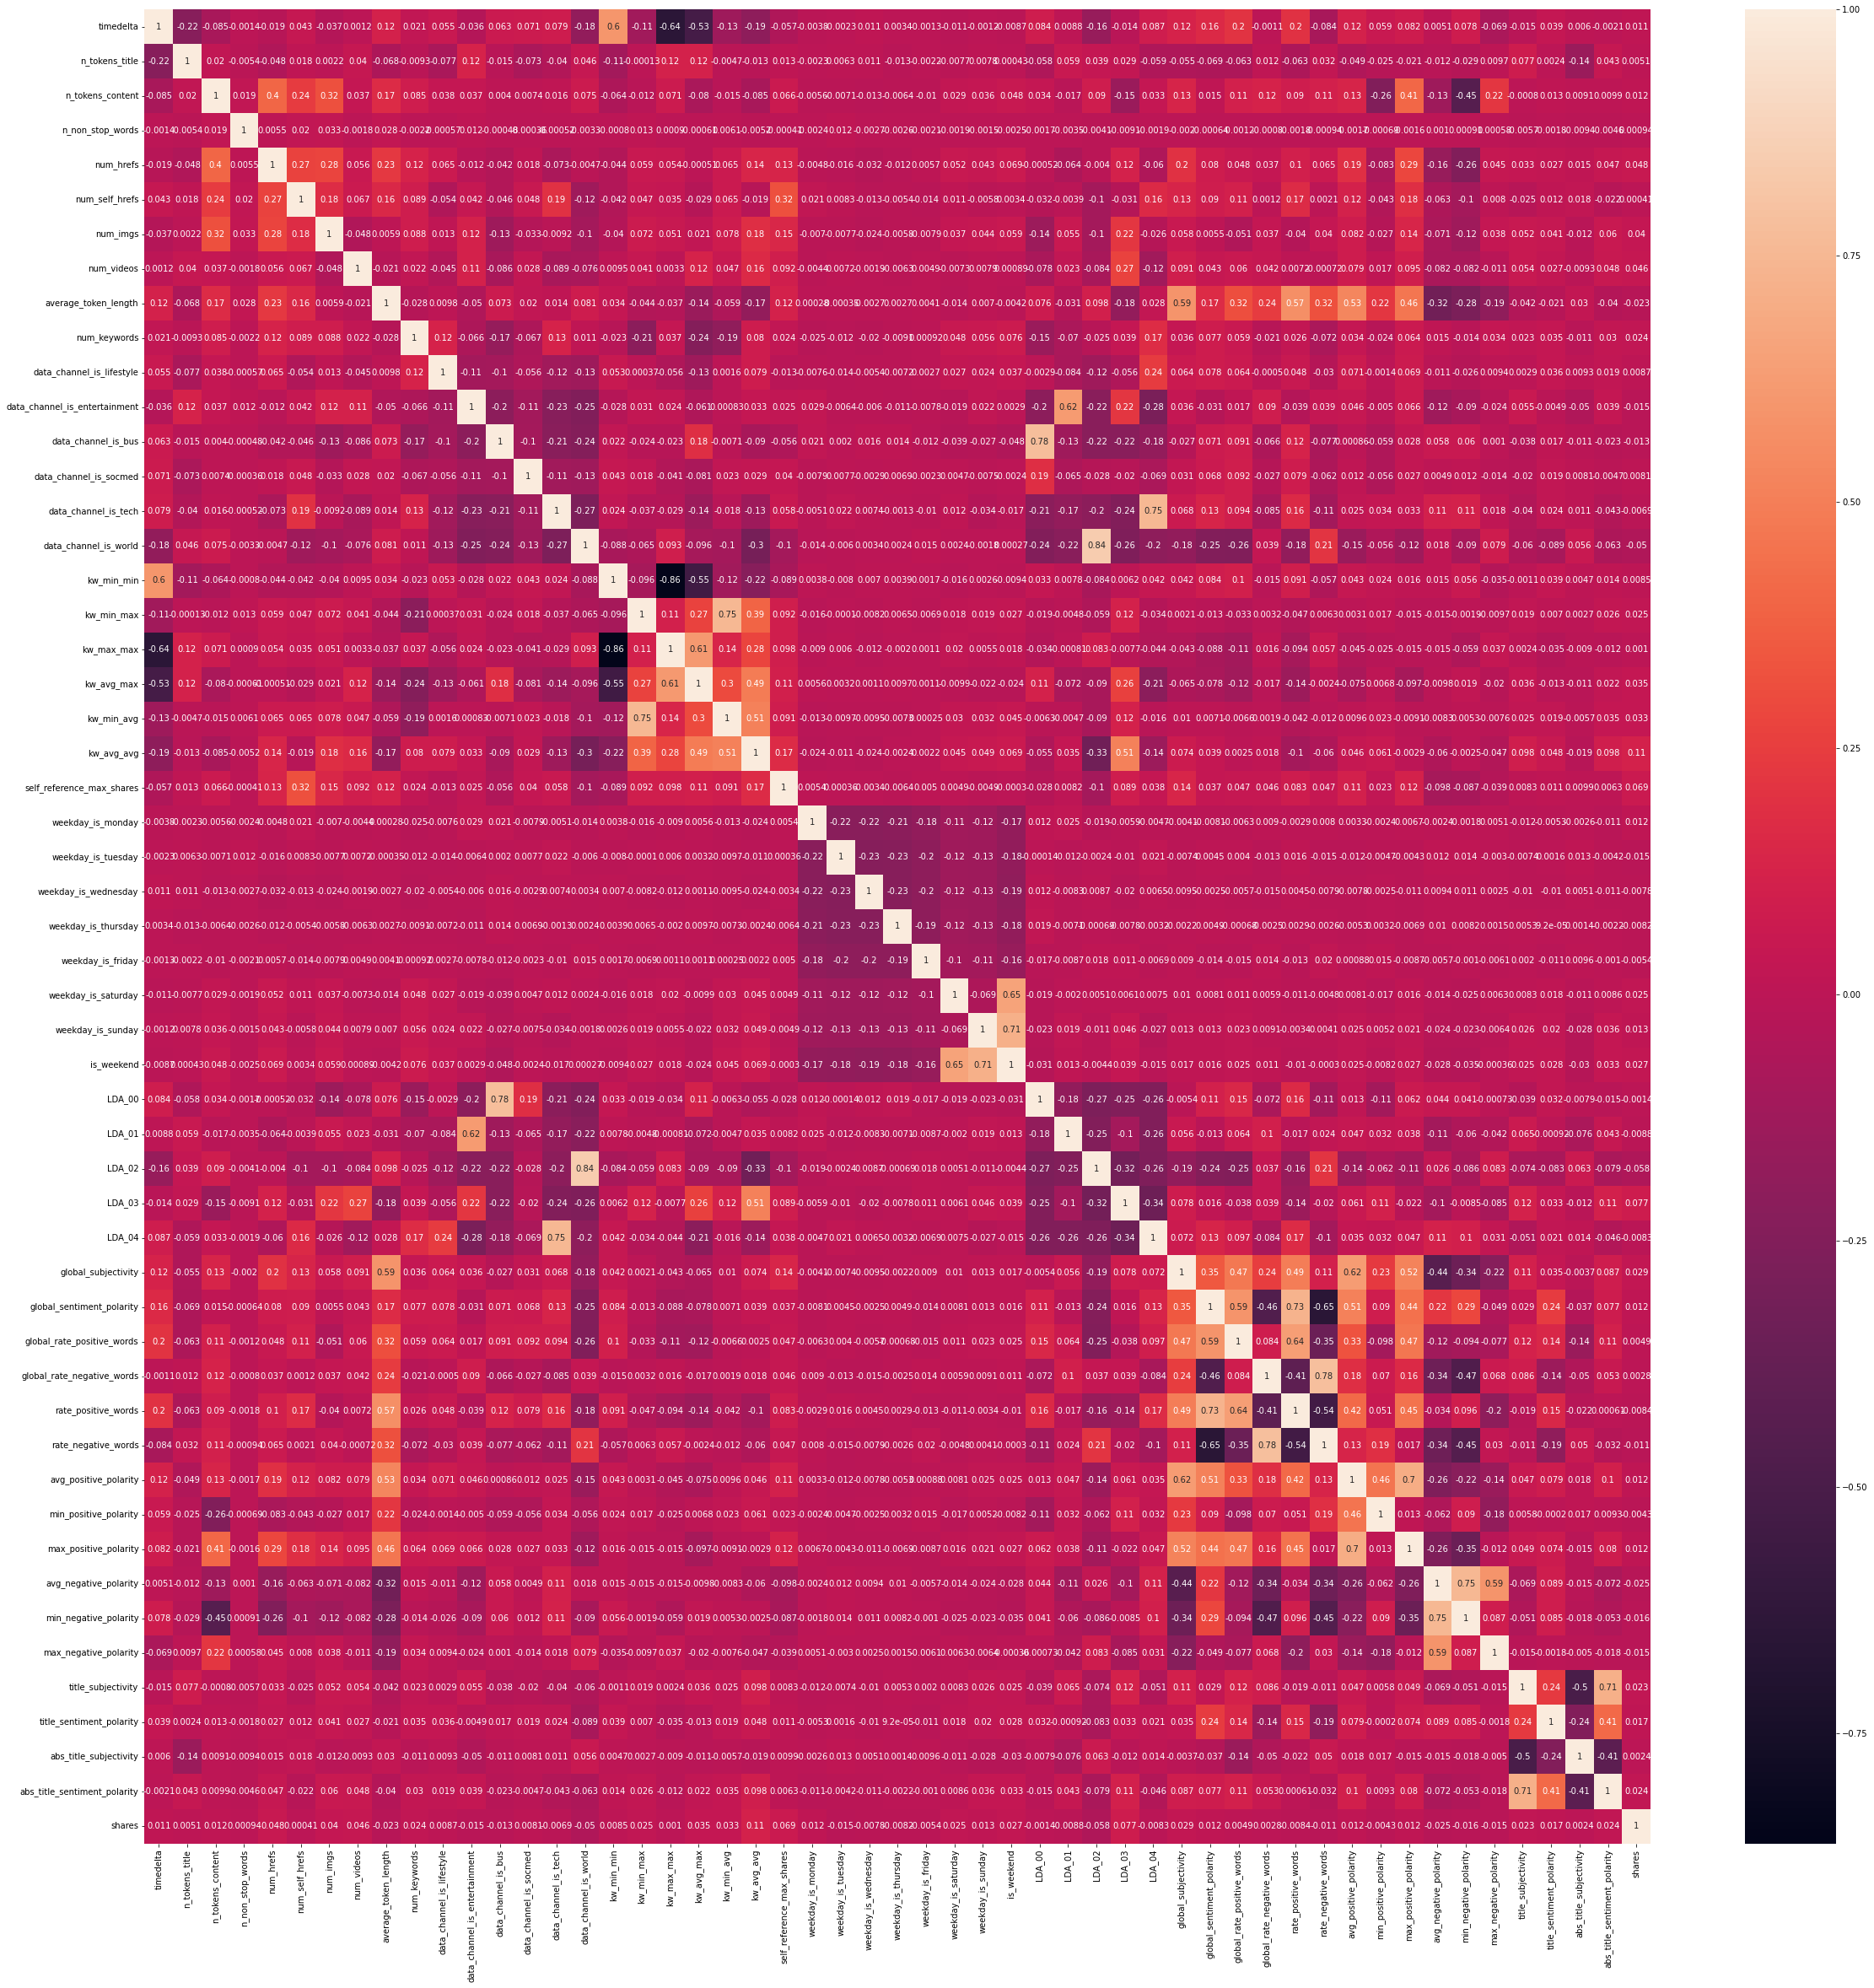

In [32]:
corr = df.corr()
plt.subplots(figsize=(40,40))

sn.heatmap(corr, annot=True)

In [34]:
#Checking correlation with y

corr = df.corr()
print(corr['shares'])

timedelta                        0.011495
n_tokens_title                   0.005102
n_tokens_content                 0.012219
n_non_stop_words                 0.000935
num_hrefs                        0.048438
num_self_hrefs                   0.000412
num_imgs                         0.039588
num_videos                       0.046362
average_token_length            -0.022757
num_keywords                     0.023944
data_channel_is_lifestyle        0.008712
data_channel_is_entertainment   -0.014568
data_channel_is_bus             -0.013059
data_channel_is_socmed           0.008061
data_channel_is_tech            -0.006905
data_channel_is_world           -0.050120
kw_min_min                       0.008475
kw_min_max                       0.025170
kw_max_max                       0.001019
kw_avg_max                       0.034730
kw_min_avg                       0.032920
kw_avg_avg                       0.112863
self_reference_max_shares        0.068946
weekday_is_monday                0

In [35]:
df['shares'].describe()

count     32602.000000
mean       3128.580394
std       10096.981898
min           5.000000
25%         932.000000
50%        1400.000000
75%        2600.000000
max      690400.000000
Name: shares, dtype: float64

In [36]:
#replace shares with popular and unpoular

def replaceValues(x):
    if x <= 1400 :
        return 0
    else :
        return 1
df['shares'] = df['shares'].apply(replaceValues)
df

,timedelta,n_tokens_title,n_tokens_content,n_non_stop_words,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,731,12,219,1.0,4,2,1,0,4.680365,5,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,731,9,255,1.0,3,1,1,0,4.913725,4,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,731,9,211,1.0,3,1,1,0,4.393365,6,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,731,9,531,1.0,9,0,1,0,4.404896,7,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,731,13,1072,1.0,19,19,20,0,4.682836,7,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39635,9,13,478,1.0,18,2,2,0,4.891213,6,...,0.033333,1.0,-0.223611,-0.400,-0.050000,0.100000,0.000000,0.400000,0.000000,0
39636,8,8,2509,1.0,23,1,10,0,4.569550,10,...,0.100000,1.0,-0.231612,-0.600,-0.050000,0.000000,0.000000,0.500000,0.000000,1
39637,8,13,1629,1.0,15,12,6,0,4.552486,8,...,0.033333,1.0,-0.429534,-1.000,-0.050000,0.783333,-0.600000,0.283333,0.600000,0
39638,8,11,223,1.0,5,3,1,0,4.923767,6,...,0.214286,0.8,-0.250000,-0.250,-0.250000,0.000000,0.000000,0.500000,0.000000,0


,shares,No of articles
0,0,16978
1,1,15624


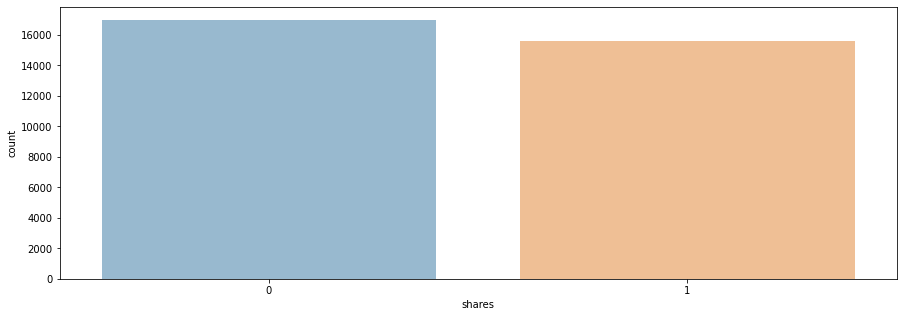

In [37]:
fig = plt.figure(figsize=(15,5))
ax = sn.countplot(x='shares',data=df,alpha=0.5)

data_channel_data = df.groupby('shares').size().reset_index()
data_channel_data.columns = ['shares','No of articles']
data_channel_data

In [38]:
# separate the independent and dependent variables
y = df.iloc[:,-1]
x = df.iloc[:,:-1]

## Decision Trees

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_at_state = 0
max_accuracy = 0

for r in range(43):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=r)
    clf = DecisionTreeClassifier(criterion='gini', max_depth=5).fit(x_train,y_train)
    y_pred_test = clf.predict(x_test)
    accuracy = accuracy_score(y_pred_test, y_test)

    if max_accuracy<accuracy:
        max_at_state = r
        max_accuracy = accuracy
print(f"At random state {max_at_state}, there is maximum accuracy of {max_accuracy*100:.2f}%")

At random state 31, there is maximum accuracy of 64.45%


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

max_at_state = 0
max_accuracy = 0

for r in range(43):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=r)
    clf = RandomForestClassifier(max_depth=5, random_state=1).fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_pred, y_test)
    
    if max_accuracy<accuracy:
        max_at_state = r
        max_accuracy = accuracy
print(f"At random state {max_at_state}, there is maximum accuracy of {max_accuracy*100:.2f}%")
  

At random state 35, there is maximum accuracy of 66.24%
